# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


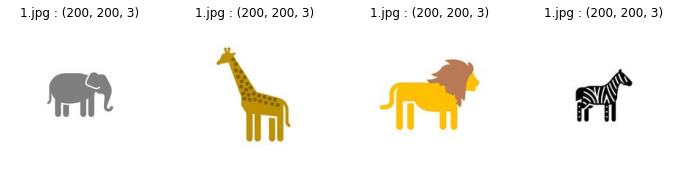

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
data_path = 'data/safari/training'

# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

> **Note**: There is no single "correct" solution. Sample solutions are provided in [05 - Safari CNN Solution (PyTorch).ipynb](05%20-%20Safari%20CNN%20Solution%20(PyTorch).ipynb) and [05 - Safari CNN Solution (TensorFlow).ipynb](05%20-%20Safari%20CNN%20Solution%20(TensorFlow).ipynb).

In [ ]:
# Your Code to train a CNN model...

In [2]:
# import libraries
import tensorflow
from  tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print('TensorFlow version:',tensorflow.__version__)
print('Keras version:',keras.__version__)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
TensorFlow version: 2.5.0-rc1
Keras version: 2.5.0


## Prepare the data

In [3]:
img_size = (200, 200)
batch_size = 30

print("Getting Data...")
datagen = ImageDataGenerator(rescale = 1./255 # rescale pixels
                           ,validation_split = 0.3)

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_path
   ,target_size = img_size
   ,batch_size = batch_size
   ,class_mode = 'categorical'
   ,subset = 'training'
)
print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_path
   ,target_size = img_size
   ,batch_size = batch_size
   ,class_mode = 'categorical'
   ,subset = 'validation'
)
classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 280 images belonging to 4 classes.
Preparing validation dataset...
Found 116 images belonging to 4 classes.
Data generators ready


## Define the CNN

In [ ]:
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

# Define the model as a sequence of layers
model = Sequential()

model.add(Conv2D(32, (6,6 ), input_shape = train_generator.image_shape, activation = 'relu'))

## Save your model

Add code below to save your model's trained weights.

In [ ]:
# Code to save your model

## Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

In [ ]:
# Function to predict the class of an image
def predict_image(classifier, image):
    import numpy
    
    # Default value
    index = 0
    
    # !!Add your code here to predict an image class from your model!!
    
    # Return the predicted index
    return index


# Load your model
model = 'Load Your Model'

# The images are in the data/shapes folder
test_data_path = 'data/safari/test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Get the image class prediction
    index = predict_image(model, np.array(img))
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()

Hopefully, your model predicted all four of the image classes correctly!